# <span style="color: green; font-size: 30px; font-weight: bold;">redaing the data</span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'E:\ARAS\customer churn paper\code\Aras_transactions_new.csv')
df

,date,SaleTime,art_name,articles_id,price_purchase,price_item,Quantity,BranchCode,BranchName,customers_id,takhfif,gerd,Maliat,Payment channel,Sales channel,factor_id,d_dat,group_id
0,1395-01-01,23:59:58,خانواده پپسي,611,2500.0,2500,1.0,13803,پاسداران,9120306517,0.0,-100.0,3600.0,نقدی,حضوری,6,2016-03-20,600
1,1395-01-01,23:59:58,سيب زميني مخصوص,501,7500.0,7500,1.0,13803,پاسداران,9120306517,0.0,-100.0,3600.0,نقدی,حضوری,6,2016-03-20,500
2,1395-01-01,23:59:58,لند برگر,101,27000.0,13500,2.0,13803,پاسداران,9120306517,0.0,-100.0,3600.0,نقدی,حضوری,6,2016-03-20,100
3,1395-01-01,22:36:01,اسموكي برگر,102,14500.0,14500,1.0,13804,اندرزگو,9128302458,0.0,-205.0,2205.0,نقدی,حضوری,9,2016-03-20,100
4,1395-01-01,22:36:01,سيب زميني مخصوص,501,7500.0,7500,1.0,13804,اندرزگو,9128302458,0.0,-205.0,2205.0,نقدی,حضوری,9,2016-03-20,500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7284203,1403-05-12,15:51:15,چيکن رپ,903,194500.0,194500,1.0,13814,شعبه بازار (پرنسا),9351555271,0.0,50.0,19450.0,نقدی,حضوری,3765492,2024-08-02,900
7284204,1403-05-12,15:51:15,زيرو قوطي,604,24500.0,24500,1.0,13814,شعبه بازار (پرنسا),9351555271,0.0,50.0,19450.0,نقدی,حضوری,3765492,2024-08-02,600
7284205,1403-05-12,16:23:22,لند برگر,101,242500.0,242500,1.0,13814,شعبه بازار (پرنسا),9173058935,0.0,0.0,24250.0,نقدی,حضوری,3765493,2024-08-02,100
7284206,1403-05-12,16:23:22,هي دي استوايي,641,30000.0,30000,1.0,13814,شعبه بازار (پرنسا),9173058935,0.0,0.0,24250.0,نقدی,حضوری,3765493,2024-08-02,600


In [3]:
# article = pd.read_csv(r'E:\ARAS\customer churn\codes\articles.csv')

In [4]:
# df = pd.merge(df, article, on='articles_id', how='inner')

# <span style="color: green; font-size: 30px; font-weight: bold;">filtering</span>

In [5]:
def process_dataframe(df):
    # Select specific columns
    df = df[['customers_id', 'price_purchase', 'd_dat', 'group_id']]
    
    # Convert 'd_dat' to datetime format
    df['date'] = pd.to_datetime(df['d_dat'])
    
    # Drop the original 'd_dat' column
    df = df.drop('d_dat', axis=1)
    
    # Extract the day of the week from 'date'
    df['day_of_week'] = df['date'].dt.day_name()
    
    # Convert 'customers_id' to string
    df['customers_id'] = df['customers_id'].astype(str)
    
    # Filter rows where 'customers_id' starts with '9' and its length is between 8 and 13
    df = df[df['customers_id'].str.startswith('9') & df['customers_id'].str.len().between(8, 13)]
    
    # Convert 'customers_id' and 'group_id' back to appropriate types
    df['customers_id'] = df['customers_id'].astype('int64').astype(str)
    df['group_id'] = df['group_id'].astype(str)
    
    return df

df = process_dataframe(df)


In [6]:
unique_customer = df['customers_id'].nunique()
print(f"number of unique customers in the original data = {unique_customer}")

number of unique customers in the original data = 864869


# <span style="color: green; font-size: 30px; font-weight: bold;">creating 4 different dataframes</span>

Time calculator 

In [7]:
# Use this function to estimate the average number of days in a window if neccesary 

def average_days_in_months(months):
    # Average days per month considering leap years
    average_days_per_month = (365 * 3 + 366) / (12 * 4)
    
    # Total days for the given number of months
    total_days = average_days_per_month * months
    
    return round(total_days)

given_month = 7   # Enter the number of months as an input to the function 

days_in_months = average_days_in_months(given_month)
print(f"Average number of days in {given_month} months: {days_in_months}")

Average number of days in 7 months: 213


In [18]:
import pandas as pd

def create_dataframes(date_start, length_of_each_window, gap_between_each_dataframe, num_df, df):
    # Determine the initial start date
    date1_start = pd.Timestamp(date_start)
    date2_start = df['date'].min()

    # Calculate the difference in days to adjust the start date
    difference_in_days_start = (date1_start - date2_start).days
    start_cutoff_date_0 = df['date'].min() + pd.Timedelta(days=difference_in_days_start)
    break_cutoff_date_0 = start_cutoff_date_0 + pd.Timedelta(days=length_of_each_window)

    # Initialize lists to store the start and break dates
    start_cutoff_dates = [start_cutoff_date_0]
    break_cutoff_dates = [break_cutoff_date_0]

    # Calculate the subsequent dates for each DataFrame
    for i in range(num_df - 1):
        next_start_date = start_cutoff_dates[i] + pd.Timedelta(days=gap_between_each_dataframe)
        next_break_date = break_cutoff_dates[i] + pd.Timedelta(days=gap_between_each_dataframe)
        start_cutoff_dates.append(next_start_date)
        break_cutoff_dates.append(next_break_date)
        

    # Create empty DataFrames
    dataframes = [pd.DataFrame() for _ in range(num_df)]

    # Filter the DataFrame based on start and break cutoff dates
    for i in range(len(break_cutoff_dates)):
        dataframes[i] = df[(df['date'] >= start_cutoff_dates[i]) & (df['date'] <= break_cutoff_dates[i])]
        globals()[f"df{i}"] = dataframes[i]

    return start_cutoff_dates, break_cutoff_dates, dataframes

length_of_each_window = 213 # Data window length             
length_of_the_label_window = 30 # Label window length 
gap_between_each_dataframe = length_of_each_window + length_of_the_label_window # Data window + Label window 

num_df = 4

total_gap = num_df * gap_between_each_dataframe

# Calculate the new start date
date_start = df['date'].max() - pd.Timedelta(days=total_gap)

start_cutoff_dates, break_cutoff_dates, dfs = create_dataframes(date_start, length_of_each_window, gap_between_each_dataframe, num_df, df)

# Assign the data frames
df0 = dfs[0]
df1 = dfs[1]
df2 = dfs[2]
df3 = dfs[3]

len(dfs)

4

<span style="color: red; font-size: 25px; font-weight: bold;">extracting labels for each dataframe from the original df</span>

In [20]:
def create_label_dfs(df, break_cutoff_dates, length_of_the_label_window, num_df):
    label_dfs = []
    label_lists = []

    # Loop through each DataFrame and create the corresponding label DataFrame
    for i in range(num_df):
        df_label = df[(df['date'] >= break_cutoff_dates[i]) & 
                      (df['date'] <= break_cutoff_dates[i] + pd.Timedelta(days=length_of_the_label_window))]
        label_dfs.append(df_label)
        label_lists.append(df_label['customers_id'].tolist())

        # Dynamically create a variable name and assign the DataFrame to it
        globals()[f'df{i}_label'] = df_label
    
    return label_dfs, label_lists

length_of_the_label_window = length_of_the_label_window  # Set the length of the label window as needed
num_df = num_df  # Number of DataFrames

label_dfs, label_lists = create_label_dfs(df, break_cutoff_dates, length_of_the_label_window, num_df)

df0_label = label_dfs[0]
df1_label = label_dfs[1]
df2_label = label_dfs[2]
df3_label = label_dfs[3]

df0_label_list = label_lists[0]
df1_label_list = label_lists[1]
df2_label_list = label_lists[2]
df3_label_list = label_lists[3]

In [21]:
df0['date'].min(), df0['date'].max() , df0_label['date'].min(), df0_label['date'].max()

(Timestamp('2021-12-04 00:00:00'),
 Timestamp('2022-07-05 00:00:00'),
 Timestamp('2022-07-05 00:00:00'),
 Timestamp('2022-08-04 00:00:00'))

In [22]:
df3['date'].min(), df3['date'].max() , df3_label['date'].min(), df3_label['date'].max()

(Timestamp('2023-12-03 00:00:00'),
 Timestamp('2024-07-03 00:00:00'),
 Timestamp('2024-07-03 00:00:00'),
 Timestamp('2024-08-02 00:00:00'))

<span style="color: red; font-size: 25px; font-weight: bold;">dropping duplicate rows and also consider only one of customers purchase for each date. dropping 2 or less transactions</span>

In [23]:
def clean_dataframe(df):
    # Drop duplicates based on 'customers_id' and 'date', keeping the first occurrence
    df_cleaned = df.drop_duplicates(subset=['customers_id', 'date'], keep='first')

    # Identify customers with two or fewer purchases
    customers_to_drop = df_cleaned['customers_id'].value_counts()[df_cleaned['customers_id'].value_counts() <= 2].index

    # Drop these customers from the DataFrame
    df_cleaned = df_cleaned[~df_cleaned['customers_id'].isin(customers_to_drop)]

    return df_cleaned


df0 = clean_dataframe(df0)
df1 = clean_dataframe(df1)
df2 = clean_dataframe(df2)
df3 = clean_dataframe(df3)

# <span style="color: green; font-size: 30px; font-weight: bold;">adding feature</span>

## lifetime feature 

In [24]:
import lifetimes

# Function to calculate metrics
def calculate_metrics(df, current_date):
    metrics_pd = (
        lifetimes.utils.summary_data_from_transaction_data(
            df,
            customer_id_col='customers_id',
            datetime_col='date',
            observation_period_end=current_date, 
            freq='D'
        )
    )
    filtered_pd = metrics_pd[metrics_pd['frequency'] > 0]
    filtered_pd.reset_index(inplace=True)  # Ensure customers_id is a column
    return filtered_pd

# Calculate metrics for each subset with different current_date values
metrics_0 = calculate_metrics(df0, df0['date'].max())
metrics_1 = calculate_metrics(df1, df1['date'].max())
metrics_2 = calculate_metrics(df2, df2['date'].max())
metrics_3 = calculate_metrics(df3, df3['date'].max())



In [25]:
from lifetimes import BetaGeoFitter

# Function to fit BG/NBD model and predict expected number of purchases in the next 30 days
def predict_expected_purchases(metrics_pd, t=30, penalizer_coef=0.01):
    bgf = BetaGeoFitter(penalizer_coef=penalizer_coef)
    bgf.fit(metrics_pd['frequency'], metrics_pd['recency'], metrics_pd['T'])
    
    # Predict the expected number of purchases for the next t days
    metrics_pd[f'expected_purchases_{t}'] = bgf.predict(t, metrics_pd['frequency'], metrics_pd['recency'], metrics_pd['T'])
    return metrics_pd

# Fit BG/NBD model and predict expected number of purchases in the next 30 days
metrics_0 = predict_expected_purchases(metrics_0, t=length_of_the_label_window, penalizer_coef=0.1)
metrics_1 = predict_expected_purchases(metrics_1, t=length_of_the_label_window, penalizer_coef=0.1)
metrics_2 = predict_expected_purchases(metrics_2, t=length_of_the_label_window, penalizer_coef=0.1)
metrics_3 = predict_expected_purchases(metrics_3, t=length_of_the_label_window, penalizer_coef=0.1)



In [26]:
t = length_of_the_label_window
df0 = pd.merge(df0, metrics_0[['customers_id', 'recency', f'expected_purchases_{t}']], on='customers_id', how='left')
df1 = pd.merge(df1, metrics_1[['customers_id', 'recency', f'expected_purchases_{t}']], on='customers_id', how='left')
df2 = pd.merge(df2, metrics_2[['customers_id', 'recency', f'expected_purchases_{t}']], on='customers_id', how='left')
df3 = pd.merge(df3, metrics_3[['customers_id', 'recency', f'expected_purchases_{t}']], on='customers_id', how='left')



## own features

In [27]:
import pandas as pd
import numpy as np

def generate_features(df, df_name=None, break_cutoff_dates=None):
    # Step 1: Add 'purchase_month' feature
    df['purchase_month'] = df['date'].dt.to_period('M')
    
    # Step 2: Add 'most_common_day' feature
    def add_most_common_day(df):
        def most_common_day(series):
            return series.mode().iloc[0]
        common_days = df.groupby('customers_id')['day_of_week'].agg(most_common_day).reset_index()
        common_days.rename(columns={'day_of_week': 'most_common_day'}, inplace=True)
        return df.merge(common_days, on='customers_id')

    df = add_most_common_day(df)
    
    # Step 3: Add 'number_of_purchases' feature
    def purchase_count(df):
        count_purchase = df['customers_id'].value_counts().rename('number_of_purchases')
        return df.merge(count_purchase, left_on='customers_id', right_index=True)

    df = purchase_count(df)
    
    # Step 4: Calculate 'weighted_mean_time_between_purchases'
    def calculate_weighted_mean_time_between_purchases(df):
        sorted_df = df.sort_values(by=['customers_id', 'date'], ascending=[True, False])
        sorted_df['time_diff'] = sorted_df.groupby('customers_id')['date'].diff().dt.days * -1
        time_diffs = sorted_df.dropna(subset=['time_diff'])
        
        def weighted_mean(group):
            n = len(group)
            weights = [(n - i) ** 2 for i in range(n)]
            return np.average(group, weights=weights)

        weighted_mean_time_diff = time_diffs.groupby('customers_id')['time_diff'].apply(weighted_mean).reset_index(name='weighted_mean_time_between_purchases')
        return df.merge(weighted_mean_time_diff, on='customers_id', how='left').fillna(0)

    df = calculate_weighted_mean_time_between_purchases(df)
    
    # Step 5: Calculate 'std_between_purchase'
    def calculate_std_features(df):
        sorted_df = df.sort_values(by=['customers_id', 'date'], ascending=[True, False])
        sorted_df['time_diff'] = sorted_df.groupby('customers_id')['date'].diff().dt.days * -1

        def calculate_std_between_purchase(group):
            n = len(group)
            if n == 1:
                return 0
            weights = [(n - i) ** 2 for i in range(1, n)]
            weight_sum = sum(weights)
            normalized_weights = [w / weight_sum for w in weights]
            weighted_mean = np.dot(group[1:], normalized_weights)
            squared_differences = ((group[1:] - weighted_mean) ** 2)
            return np.sqrt(np.dot(squared_differences, normalized_weights))

        std_between_purchase = sorted_df.groupby('customers_id')['time_diff'].apply(calculate_std_between_purchase).reset_index(name='std_between_purchase')
        return df.merge(std_between_purchase, on='customers_id', how='left')

    df = calculate_std_features(df)
    
    # Step 6: Calculate 'max_time_without_purchase'
    def calculate_max_without_purchase(df):
        sorted_df = df.sort_values(by=['customers_id', 'date'], ascending=[True, False])
        sorted_df['time_diff'] = sorted_df.groupby('customers_id')['date'].diff().dt.days * -1
        max_time_without_purchase = sorted_df.groupby('customers_id')['time_diff'].max().reset_index(name='max_time_without_purchase')
        return df.merge(max_time_without_purchase, on='customers_id', how='left')

    df = calculate_max_without_purchase(df)
    
    # Time since last purchase in months 
    # # Step 7: Conditional 'calculate_time_since_last_purchase'
    # def calculate_time_since_last_purchase(df, index):
    #     last_purchase_date = df.groupby('customers_id')['date'].max().reset_index(name='last_purchase_date')
    #     specific_date = break_cutoff_dates[index]
    #     last_purchase_date['time_since_last_purchase'] = (
    #         (specific_date.year - last_purchase_date['last_purchase_date'].dt.year) * 12 +
    #         (specific_date.month - last_purchase_date['last_purchase_date'].dt.month)
    #     )
    #     return df.merge(last_purchase_date[['customers_id', 'time_since_last_purchase']], on='customers_id', how='left')
    
    # Time since last purchase in days 
    def calculate_time_since_last_purchase(df, index):
        # Get the last purchase date for each customer
        last_purchase_date = df.groupby('customers_id')['date'].max().reset_index(name='last_purchase_date')
        
        # Define the specific date (cutoff date)
        specific_date = break_cutoff_dates[index]
        
        # Calculate the difference in days
        last_purchase_date['time_since_last_purchase'] = (specific_date - last_purchase_date['last_purchase_date']).dt.days
        
        # Merge the result back into the original DataFrame
        return df.merge(last_purchase_date[['customers_id', 'time_since_last_purchase']], on='customers_id', how='left')
    
    
    
    
    # Apply the correct time_since_last_purchase calculation based on df_name
    if df_name is not None:
        index_mapping = {'df0': 0, 'df1': 1, 'df2': 2, 'df3': 3}
        if df_name in index_mapping:
            df = calculate_time_since_last_purchase(df, index_mapping[df_name])

    # Step 8: Conditional 'calculate_time_since_first_purchase'
    def calculate_time_since_first_purchase(df, index):
        first_purchase_date = df.groupby('customers_id')['date'].min().reset_index(name='first_purchase_date')
        specific_date = break_cutoff_dates[index]
        first_purchase_date['time_since_first_purchase'] = (specific_date - first_purchase_date['first_purchase_date']).dt.days
        return df.merge(first_purchase_date[['customers_id', 'time_since_first_purchase']], on='customers_id', how='left')

    # Apply the correct time_since_first_purchase calculation based on df_name
    if df_name is not None:
        if df_name in index_mapping:
            df = calculate_time_since_first_purchase(df, index_mapping[df_name])

    # Step 9: Calculate 'transaction recency'
    def calculate_transaction_recency(df):
        num_unique_customers = df['customers_id'].nunique()
        last_purchase_date = df.groupby('customers_id')['date'].max().reset_index(name='last_purchase_date')
        last_purchase_date['time_since_last_purchase'] = df['time_since_last_purchase']
        last_purchase_date['transaction recency'] = last_purchase_date['time_since_last_purchase'] / num_unique_customers
        return df.merge(last_purchase_date[['customers_id', 'transaction recency']], on='customers_id', how='left')

    df = calculate_transaction_recency(df)
    
    # Step 10: Add one-hot encoded features for 'time_since_last_purchase'
    def add_onehot_last_purchase(df, threshold):
        upper_limit = threshold + 30
        new_column_name = f'last_between_{threshold}_and_{upper_limit}'
        df[new_column_name] = ((df['time_since_last_purchase'] >= threshold) & (df['time_since_last_purchase'] < upper_limit)).astype(int)
        return df

    thresholds = [0, 30, 60]
    for threshold in thresholds:
        df = add_onehot_last_purchase(df, threshold)
    
    # Step 11: Calculate 'diff_last_and_penultimate'
    def calculate_time_between_last_two_purchases(df):
        if df['date'].dtype == 'object':
            df['date'] = pd.to_datetime(df['date'])
        df_sorted = df.sort_values(by=['customers_id', 'date'])
        grouped_dates = df_sorted.groupby('customers_id')['date'].apply(list)
        diff_last_and_penultimate = grouped_dates.apply(lambda dates: (dates[-1] - dates[-2]).days if len(dates) > 1 else None)
        diff_last_and_penultimate = diff_last_and_penultimate.reset_index(name='diff_last_and_penultimate')
        return df.merge(diff_last_and_penultimate, on='customers_id', how='left')

    df = calculate_time_between_last_two_purchases(df)
    
    # Step 12: Calculate 'diff_penultimate_and_previous'
    def calculate_time_between_penultimate_and_previous(df):
        if df['date'].dtype == 'object':
            df['date'] = pd.to_datetime(df['date'])
        df_sorted = df.sort_values(by=['customers_id', 'date'])  # Corrected line
        grouped_dates = df_sorted.groupby('customers_id')['date'].apply(list)
        diff_penultimate_and_previous = grouped_dates.apply(lambda dates: (dates[-2] - dates[-3]).days if len(dates) > 2 else None)
        diff_penultimate_and_previous = diff_penultimate_and_previous.reset_index(name='diff_penultimate_and_previous')
        return df.merge(diff_penultimate_and_previous, on='customers_id', how='left')

    df = calculate_time_between_penultimate_and_previous(df)

    
    # Step 13: Add 'threshold' features
    def add_threshold_features(df):
        h_1 = 2
        h_2 = 4
        h_3 = 8
        df['tresh_1'] = df['weighted_mean_time_between_purchases'] + h_1 * df['std_between_purchase']
        df['tresh_2'] = df['weighted_mean_time_between_purchases'] + h_2 * df['std_between_purchase']
        df['tresh_3'] = df['weighted_mean_time_between_purchases'] + h_3 * df['std_between_purchase']
        return df

    df = add_threshold_features(df)

    # Step 14: Frequency classification
    def classify_frequency(row):
        if row['time_since_last_purchase'] <= row['tresh_1']:
            return 'normal'
        elif row['time_since_last_purchase'] <= row['tresh_2']:
            return 'attrition'
        elif row['time_since_last_purchase'] <= row['tresh_3']:
            return 'at-risk'
        else:
            return 'lost'

    def frequency_classification(df):
        df['freq_class'] = df.apply(classify_frequency, axis=1)
        return df

    df = frequency_classification(df)

    # Step 15: Add moving average features
    def add_moving_average_purchase_feature(df, window_size, column_name):
        df_sorted = df.sort_values(by=['customers_id', 'date']).copy()
        df[column_name] = df_sorted.groupby('customers_id')['price_purchase'].transform(
            lambda x: x.rolling(window=window_size, min_periods=1).mean())
        return df

    df = add_moving_average_purchase_feature(df, 3, 'rolling_avg_3')
    df = add_moving_average_purchase_feature(df, 6, 'rolling_avg_6')

    # Step 16: Add binned purchase feature
    def add_binned_purchase_feature(df):
        purchase_sums = df.groupby('customers_id')['price_purchase'].sum().reset_index(name='binned_purchase')
        return pd.merge(df, purchase_sums, on='customers_id', how='left')

    df = add_binned_purchase_feature(df)

    # Step 17: Calculate relative change
    def calculate_relative_change(df):
        df_sorted = df.sort_values(by=['customers_id', 'date'])
        if 'rolling_avg_6' not in df.columns:
            df_sorted['rolling_avg_6'] = df_sorted.groupby('customers_id')['price_purchase'].transform(
                lambda x: x.rolling(window=6, min_periods=1).mean())
        df_sorted['rolling_avg_6'].fillna(0, inplace=True)
        last_price_purchase = df_sorted.groupby('customers_id')['price_purchase'].last().fillna(0)
        sixth_last_rolling_avg = df_sorted.groupby('customers_id').apply(
            lambda x: x['rolling_avg_6'].iloc[-6] if len(x) >= 6 else x['rolling_avg_6'].iloc[0]).fillna(0)
        relative_change = (last_price_purchase - sixth_last_rolling_avg) / sixth_last_rolling_avg.replace(0, 1)
        df['d'] = df['customers_id'].map(relative_change)
        return df

    df = calculate_relative_change(df)

    # Step 18: Purchase trend classification
    def purchase_trend_classifier(row):
        a1 = 0.15
        a2 = 0.225
        a3 = 0.3
        if row['d'] <= -a3:
            return 'decreasing--'
        elif -a3 < row['d'] <= -a2:
            return 'decreasing-'
        elif -a2 < row['d'] <= -a1:
            return 'decreasing'
        elif -a1 < row['d'] <= a1:
            return 'stable'
        elif a1 < row['d'] <= a2:
            return 'increasing'
        elif a2 < row['d'] <= a3:
            return 'increasing+'
        elif a3 < row['d']:
            return 'increasing++'

    def purchase_trend(df):
        df['purchase_trend'] = df.apply(purchase_trend_classifier, axis=1)
        return df

    df = purchase_trend(df)

    # Step 19: Add purchase value features (max, mean, median)
    def add_max_purchase_feature(df):
        max_purchase = df.groupby('customers_id')['price_purchase'].max().reset_index(name='max_purchase')
        return pd.merge(df, max_purchase, on='customers_id', how='left')

    def add_mean_purchase_feature(df):
        mean_purchase = df.groupby('customers_id')['price_purchase'].mean().reset_index(name='mean_purchase')
        return pd.merge(df, mean_purchase, on='customers_id', how='left')

    def add_median_purchase_feature(df):
        median_purchase = df.groupby('customers_id')['price_purchase'].median().reset_index(name='median_purchase')
        return pd.merge(df, median_purchase, on='customers_id', how='left')

    df = add_max_purchase_feature(df)
    df = add_mean_purchase_feature(df)
    df = add_median_purchase_feature(df)

    # Step 20: Calculate relative purchase value
    def calculate_relative_purchase_value(df):
        df = df.sort_values(['customers_id', 'date'])
        rel_purchase_values = df.groupby('customers_id').apply(lambda group: calculate_rel_value(group))
        return df.merge(rel_purchase_values.rename('rel_purchase_value'), on='customers_id', how='left')

    def calculate_rel_value(group):
        if len(group) < 5:
            first_value = group.iloc[0]['price_purchase']
            last_value = group.iloc[-1]['price_purchase']
            if first_value == 0:
                return np.nan
            return (last_value - first_value) / first_value
        else:
            fifth_from_last_value = group.iloc[-5]['price_purchase']
            last_value = group.iloc[-1]['price_purchase']
            if fifth_from_last_value == 0:
                return np.nan
            return (last_value - fifth_from_last_value) / fifth_from_last_value

    df = calculate_relative_purchase_value(df)
    df['rel_purchase_value'].fillna(0, inplace=True)

    # Step 21: Time frame classification
    def time_frame_var_row(row):
        mu = 0.3
        if row['rel_purchase_value'] < -mu:
            return 'steady'
        elif abs(row['rel_purchase_value']) <= mu:
            return 'within-limits'
        elif row['rel_purchase_value'] > mu:
            return 'altering'

    def time_frame_char(df):
        df['time_frame_char'] = df.apply(time_frame_var_row, axis=1)
        return df

    df = time_frame_char(df)

    # Step 22: Add year, month, and day features
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    
    return df


# Example usage:
df0 = generate_features(df0, df_name='df0', break_cutoff_dates=break_cutoff_dates)
df1 = generate_features(df1, df_name='df1', break_cutoff_dates=break_cutoff_dates)
df2 = generate_features(df2, df_name='df2', break_cutoff_dates=break_cutoff_dates)
df3 = generate_features(df3, df_name='df3', break_cutoff_dates=break_cutoff_dates)

<span style="color: red; font-size: 25px; font-weight: bold;">make a list of features </span>

In [28]:
features_list = df0.columns.tolist()
print(features_list)
len(features_list)

['customers_id', 'price_purchase', 'group_id', 'date', 'day_of_week', 'recency', 'expected_purchases_30', 'purchase_month', 'most_common_day', 'number_of_purchases', 'weighted_mean_time_between_purchases', 'std_between_purchase', 'max_time_without_purchase', 'time_since_last_purchase', 'time_since_first_purchase', 'transaction recency', 'last_between_0_and_30', 'last_between_30_and_60', 'last_between_60_and_90', 'diff_last_and_penultimate', 'diff_penultimate_and_previous', 'tresh_1', 'tresh_2', 'tresh_3', 'freq_class', 'rolling_avg_3', 'rolling_avg_6', 'binned_purchase', 'd', 'purchase_trend', 'max_purchase', 'mean_purchase', 'median_purchase', 'rel_purchase_value', 'time_frame_char', 'year', 'month', 'day']


38

In [29]:
df0.shape, df1.shape, df2.shape, df3.shape

((183663, 38), (162073, 38), (161511, 38), (177390, 38))

# <span style="color: green; font-size: 30px; font-weight: bold;">adding label</span>

In [30]:
def label_df_with_list(df, customer_ids_list):
    # Create a new DataFrame to avoid modifying the original one
    labeled_df = df.copy()
    
    # Create a new column 'label' in labeled_df and initialize it with 0
    labeled_df['label'] = 0
    
    # Set label as 1 for customer IDs present in customer_ids_list
    labeled_df.loc[labeled_df['customers_id'].isin(customer_ids_list), 'label'] = 1
    
    return labeled_df

df0_labled = label_df_with_list(df0, df0_label_list)
df1_labled = label_df_with_list(df1, df1_label_list)  
df2_labled = label_df_with_list(df2, df2_label_list) 
df3_labled = label_df_with_list(df3, df3_label_list) 

In [31]:
print(df0.columns)

Index(['customers_id', 'price_purchase', 'group_id', 'date', 'day_of_week',
       'recency', 'expected_purchases_30', 'purchase_month', 'most_common_day',
       'number_of_purchases', 'weighted_mean_time_between_purchases',
       'std_between_purchase', 'max_time_without_purchase',
       'time_since_last_purchase', 'time_since_first_purchase',
       'transaction recency', 'last_between_0_and_30',
       'last_between_30_and_60', 'last_between_60_and_90',
       'diff_last_and_penultimate', 'diff_penultimate_and_previous', 'tresh_1',
       'tresh_2', 'tresh_3', 'freq_class', 'rolling_avg_3', 'rolling_avg_6',
       'binned_purchase', 'd', 'purchase_trend', 'max_purchase',
       'mean_purchase', 'median_purchase', 'rel_purchase_value',
       'time_frame_char', 'year', 'month', 'day'],
      dtype='object')


In [32]:
len(df0.columns)

38

# <span style="color: green; font-size: 30px; font-weight: bold;">sequential clustering (2 layers)</span>

Elbow Method for df0:


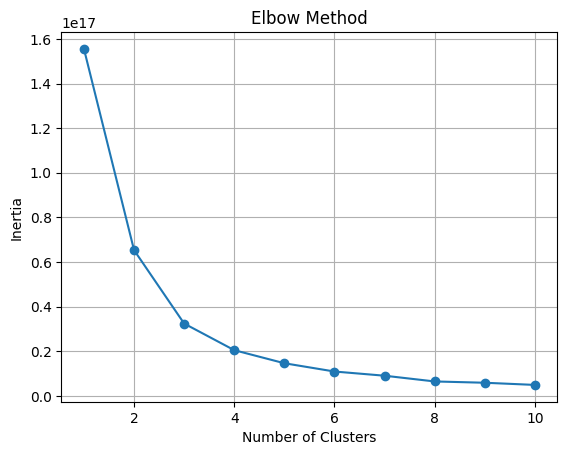

Elbow Method for df1:


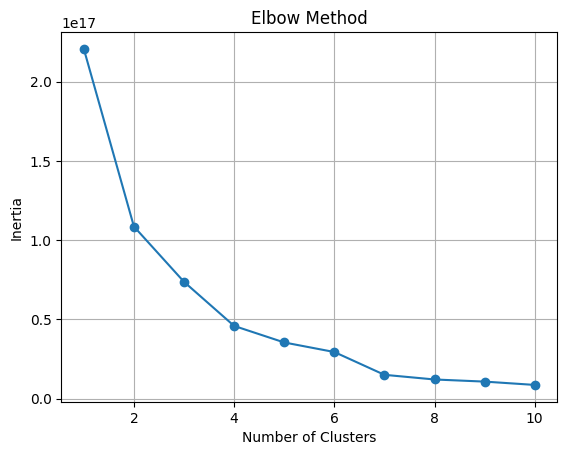

Elbow Method for df2:


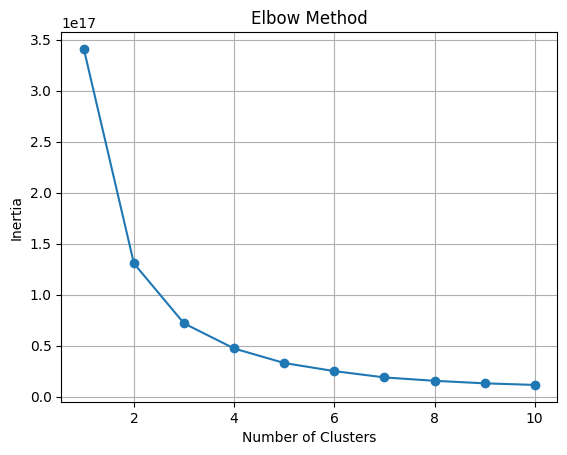

Elbow Method for df3:


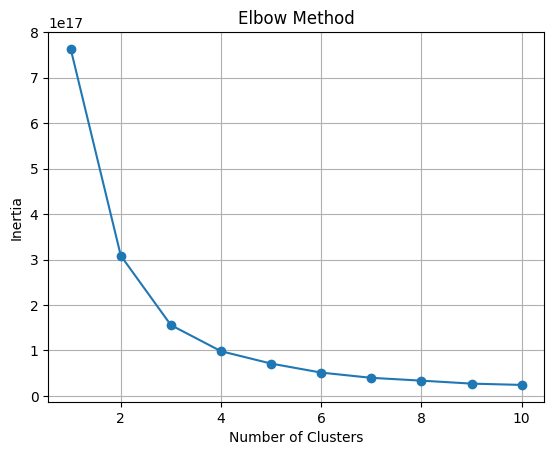

In [23]:
# import matplotlib.pyplot as plt
# from sklearn.cluster import KMeans

# # Function to calculate inertia for different cluster numbers and plot the elbow curve
# def plot_elbow_method(X, max_clusters=10):
#     inertias = []
#     for k in range(1, max_clusters + 1):
#         kmeans = KMeans(n_clusters=k, random_state=42)
#         kmeans.fit(X)
#         inertias.append(kmeans.inertia_)
    
#     plt.figure()
#     plt.plot(range(1, max_clusters + 1), inertias, marker='o')
#     plt.xlabel('Number of Clusters')
#     plt.ylabel('Inertia')
#     plt.title('Elbow Method')
#     plt.grid(True)
#     plt.show()

# # List of dataframes
# dfs = [df0, df1, df2, df3]

# for i, df in enumerate(dfs):
#     # Filter out relevant columns
#     X = df[['number_of_purchases', 'weighted_mean_time_between_purchases',
#             'std_between_purchase', 'time_since_last_purchase', 'binned_purchase', 'max_purchase', 'month',
#             f'expected_purchases_{length_of_the_label_window}', 'recency', 'time_since_first_purchase']]
    
#     # Plot the elbow method to find the optimal number of clusters
#     print(f'Elbow Method for df{i}:')
#     plot_elbow_method(X, max_clusters=10)


In [37]:
df0.drop(['cluster'], axis = 1, inplace=True)
df1.drop(['cluster'], axis = 1, inplace=True)
df2.drop(['cluster'], axis = 1, inplace=True)
df3.drop(['cluster'], axis = 1, inplace=True)

In [38]:
from sklearn.cluster import KMeans

# Initialize a list to store the results
results = []

# Manually input number of clusters (you can decide this based on elbow plots)
manual_clusters = [2, 2, 3, 3]  # Example: these numbers are based on the elbow plot inspection

# List of dataframes
dfs = [df0, df1, df2, df3]

for i, df in enumerate(dfs):
    # Filter out relevant columns
    X = df[['number_of_purchases', 'weighted_mean_time_between_purchases',
            'std_between_purchase', 'time_since_last_purchase', 'binned_purchase', 'max_purchase', 'month',
            f'expected_purchases_{length_of_the_label_window}', 'recency', 'time_since_first_purchase']]
    
    # Apply KMeans clustering with the manually selected number of clusters
    kmeans = KMeans(n_clusters=manual_clusters[i], random_state=42)
    df['cluster'] = kmeans.fit_predict(X)
    
    # Append the result to the results list
    results.append(df[['customers_id', 'cluster']])

# Merge the cluster results for each interval into a single dataframe
final_df = results[0].rename(columns={'cluster': 'cluster_0'})

for i in range(1, len(results)):
    final_df = final_df.merge(results[i].rename(columns={'cluster': f'cluster_{i}'}), on='customers_id', how='outer')

# Replace NaN values with -1 (for missing customer_ids)
final_df.fillna(-1, inplace=True)

# Convert cluster columns to integers
for col in final_df.columns[1:]:
    final_df[col] = final_df[col].astype(int)

# The final_df will have the 'customers_id' column and 4 columns for cluster assignments
final_df.columns = ['customers_id', 'interval_0_cluster', 'interval_1_cluster', 'interval_2_cluster', 'interval_3_cluster']
final_df.drop_duplicates(subset=['customers_id'], inplace=True)

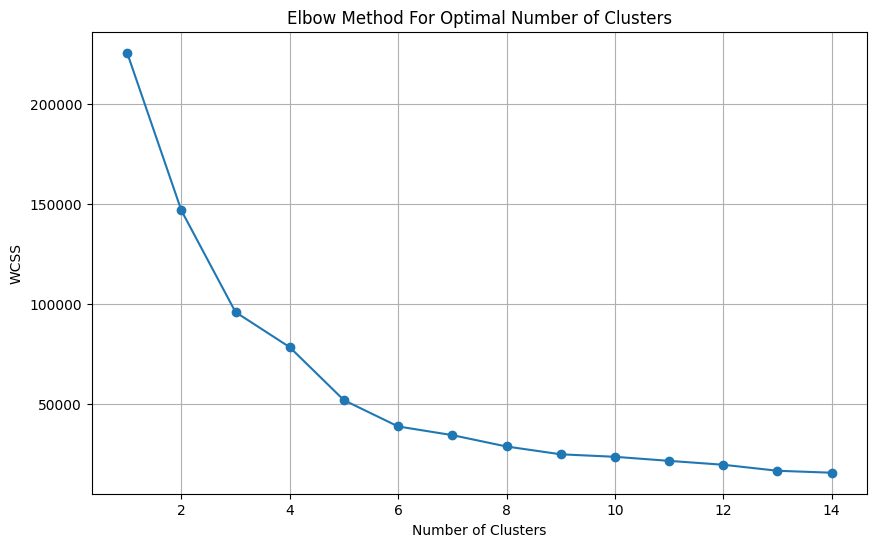

In [26]:

# # Select the columns to use for the new clustering
# X = final_df[['interval_0_cluster', 'interval_1_cluster', 'interval_2_cluster', 'interval_3_cluster']]

# # Calculate the WCSS (Within-Cluster Sum of Squares) for a range of cluster numbers
# wcss = []
# range_clusters = range(1, 15)

# for n_clusters in range_clusters:
#     kmeans = KMeans(n_clusters=n_clusters, random_state=42)
#     kmeans.fit(X)
#     wcss.append(kmeans.inertia_)

# # Plot the Elbow Method graph
# plt.figure(figsize=(10, 6))
# plt.plot(range_clusters, wcss, marker='o')
# plt.title('Elbow Method For Optimal Number of Clusters')
# plt.xlabel('Number of Clusters')
# plt.ylabel('WCSS')
# plt.grid(True)
# plt.show()


In [39]:
final_df

,customers_id,interval_0_cluster,interval_1_cluster,interval_2_cluster,interval_3_cluster
0,9001039383,-1,-1,-1,1
3,9001065686,-1,1,1,1
153,9001073086,-1,-1,0,-1
156,9001091209,-1,-1,0,-1
160,9001110115,0,-1,-1,-1
...,...,...,...,...,...
118054573,9999956313,-1,-1,0,-1
118054577,9999979115,0,1,-1,-1
118054589,9999979878,-1,-1,-1,1
118054592,9999991116,0,1,-1,-1


In [40]:
X = final_df[['interval_0_cluster', 'interval_1_cluster', 'interval_2_cluster', 'interval_3_cluster']]

# Manually input the number of clusters for the final clustering step
final_clusters = 9  # Example: select based on the elbow plot

# Apply KMeans clustering with the selected number of clusters
kmeans = KMeans(n_clusters=final_clusters, random_state=42)
final_df['final_cluster'] = kmeans.fit_predict(X)

# Display the final dataframe with the new cluster labels
final_df

,customers_id,interval_0_cluster,interval_1_cluster,interval_2_cluster,interval_3_cluster,final_cluster
0,9001039383,-1,-1,-1,1,2
3,9001065686,-1,1,1,1,8
153,9001073086,-1,-1,0,-1,0
156,9001091209,-1,-1,0,-1,0
160,9001110115,0,-1,-1,-1,3
...,...,...,...,...,...,...
118054573,9999956313,-1,-1,0,-1,0
118054577,9999979115,0,1,-1,-1,6
118054589,9999979878,-1,-1,-1,1,2
118054592,9999991116,0,1,-1,-1,6


# <span style="color: green; font-size: 30px; font-weight: bold;">preparing the data for the model</span>

In [41]:
# List of DataFrames
dfs = [df0_labled, df1_labled, df2_labled, df3_labled]

# Concatenate all DataFrames
concat_df = pd.concat(dfs, ignore_index=True)

concat_df

,customers_id,price_purchase,group_id,date,day_of_week,recency,expected_purchases_30,purchase_month,most_common_day,number_of_purchases,...,purchase_trend,max_purchase,mean_purchase,median_purchase,rel_purchase_value,time_frame_char,year,month,day,label
0,9001110115,16200.0,600,2021-12-27,Monday,159.0,0.400283,2021-12,Friday,3,...,increasing++,90500.0,45566.666667,30000.0,0.851852,altering,2021,12,27,0
1,9001110115,90500.0,200,2022-05-13,Friday,159.0,0.400283,2022-05,Friday,3,...,increasing++,90500.0,45566.666667,30000.0,0.851852,altering,2022,5,13,0
2,9001110115,30000.0,600,2022-06-04,Saturday,159.0,0.400283,2022-06,Friday,3,...,increasing++,90500.0,45566.666667,30000.0,0.851852,altering,2022,6,4,0
3,9001601666,342000.0,100,2022-03-10,Thursday,96.0,0.596999,2022-03,Friday,3,...,decreasing--,342000.0,173500.000000,148500.0,-0.912281,steady,2022,3,10,0
4,9001601666,148500.0,500,2022-06-03,Friday,96.0,0.596999,2022-06,Friday,3,...,decreasing--,342000.0,173500.000000,148500.0,-0.912281,steady,2022,6,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684632,9999912003,97500.0,500,2024-04-02,Tuesday,149.0,0.887987,2024-04,Sunday,6,...,decreasing--,159500.0,100166.666667,94500.0,-0.928177,steady,2024,4,2,0
684633,9999912003,6500.0,600,2024-06-11,Tuesday,149.0,0.887987,2024-06,Sunday,6,...,decreasing--,159500.0,100166.666667,94500.0,-0.928177,steady,2024,6,11,0
684634,9999979878,19500.0,600,2024-02-09,Friday,91.0,0.496222,2024-02,Friday,3,...,increasing+,350500.0,131333.333333,24000.0,0.230769,within-limits,2024,2,9,1
684635,9999979878,350500.0,190,2024-04-19,Friday,91.0,0.496222,2024-04,Friday,3,...,increasing+,350500.0,131333.333333,24000.0,0.230769,within-limits,2024,4,19,1


In [42]:
concat_df = pd.merge(concat_df, final_df[['customers_id', 'final_cluster']], on='customers_id', how='left')

In [43]:
concat_df['customers_id'].nunique()

82624

In [44]:
set(concat_df['label'])

{0, 1}

In [45]:
percentage_label_0 = concat_df.groupby('final_cluster')['label'].apply(lambda x: (x == 0).mean() * 100)

# Display the result in a pretty format
print("The percentage of churners in each cluster:\n")
for cluster, percentage in percentage_label_0.items():
    print(f"Cluster {cluster}: {percentage:.2f}%")


The percentage of churners in each cluster:

Cluster 0: 71.72%
Cluster 1: 75.47%
Cluster 2: 65.05%
Cluster 3: 75.05%
Cluster 4: 43.14%
Cluster 5: 47.78%
Cluster 6: 54.79%
Cluster 7: 51.96%
Cluster 8: 24.72%


In [46]:
concat_df.columns

Index(['customers_id', 'price_purchase', 'group_id', 'date', 'day_of_week',
       'recency', 'expected_purchases_30', 'purchase_month', 'most_common_day',
       'number_of_purchases', 'weighted_mean_time_between_purchases',
       'std_between_purchase', 'max_time_without_purchase',
       'time_since_last_purchase', 'time_since_first_purchase',
       'transaction recency', 'last_between_0_and_30',
       'last_between_30_and_60', 'last_between_60_and_90',
       'diff_last_and_penultimate', 'diff_penultimate_and_previous', 'tresh_1',
       'tresh_2', 'tresh_3', 'freq_class', 'rolling_avg_3', 'rolling_avg_6',
       'binned_purchase', 'd', 'purchase_trend', 'max_purchase',
       'mean_purchase', 'median_purchase', 'rel_purchase_value',
       'time_frame_char', 'year', 'month', 'day', 'label', 'final_cluster'],
      dtype='object')

<Figure size 1000x600 with 0 Axes>

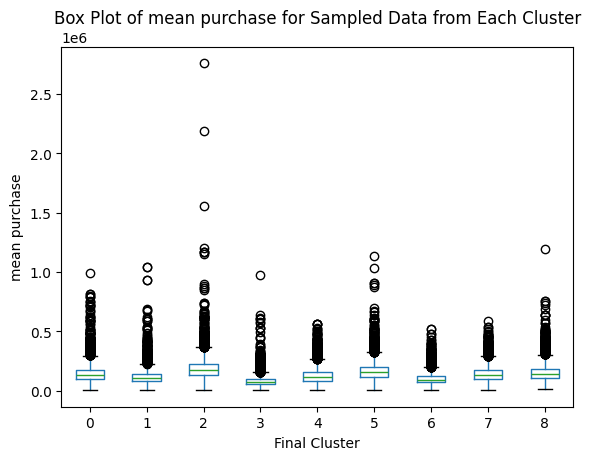

In [47]:
sampled_df = concat_df.groupby('final_cluster').apply(lambda x: x.sample(n=10000, random_state = 6)).reset_index(drop=True)

# Plot the box plot for 'expected_purchases_30' feature for each sampled cluster
plt.figure(figsize=(10, 6))
sampled_df.boxplot(column='mean_purchase', by='final_cluster', grid=False)

# Adding labels and title
plt.xlabel('Final Cluster')
plt.ylabel('mean purchase')
plt.title('Box Plot of mean purchase for Sampled Data from Each Cluster')
plt.suptitle('')  # Suppress the automatic "Boxplot grouped by" title
plt.show()

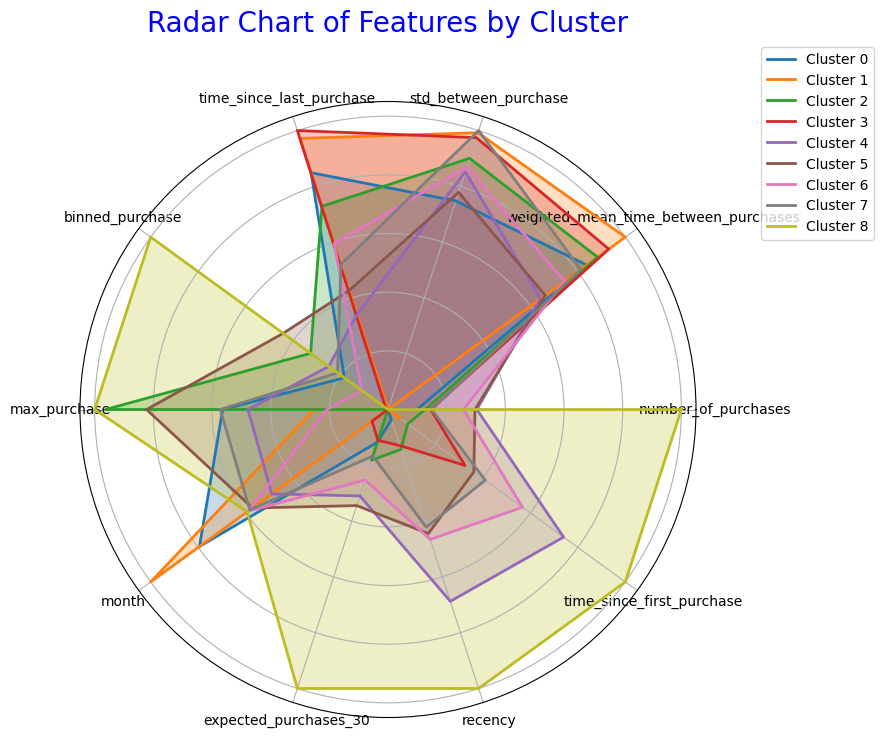

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Define the features you want to include in the radar chart
features = ['number_of_purchases', 'weighted_mean_time_between_purchases',
            'std_between_purchase', 'time_since_last_purchase', 'binned_purchase', 'max_purchase', 'month',
            f'expected_purchases_{length_of_the_label_window}', 'recency', 'time_since_first_purchase']

# Calculate the mean values of each attribute for each cluster
cluster_means = sampled_df.groupby('final_cluster')[features].mean()

# Scale the data
scaler = MinMaxScaler()
cluster_means_scaled = scaler.fit_transform(cluster_means)
cluster_means_scaled = pd.DataFrame(cluster_means_scaled, columns=cluster_means.columns)

# Function to create radar chart
def create_radar_chart(data, attributes, title):
    # Number of variables
    num_vars = len(attributes)
    
    # Compute angle of each axis
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    
    # Complete the loop
    angles += angles[:1]
    
    # Initialize the radar chart
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    
    for idx, row in data.iterrows():
        values = row.tolist()
        values += values[:1]  # Complete the loop
        ax.plot(angles, values, linewidth=2, label=f'Cluster {idx}')
        ax.fill(angles, values, alpha=0.25)
    
    # Labels for each axis
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(attributes)
    
    # Add a title and a legend
    plt.title(title, size=20, color='blue', y=1.1)
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    
    plt.show()

# Create radar chart
create_radar_chart(cluster_means_scaled, features, 'Radar Chart of Features by Cluster')

<span style="color: red; font-size: 25px; font-weight: bold;">data shuffling</span>

In [49]:
concat_df = concat_df.sample(frac=1, random_state = 42).reset_index(drop=True)

<span style="color: red; font-size: 25px; font-weight: bold;">defining X and y</span>

In [50]:
X = concat_df.drop(['label'], axis = 1)
y = concat_df['label']
X.shape, y.shape 

((684637, 39), (684637,))

In [51]:
y.value_counts()

label
0    392117
1    292520
Name: count, dtype: int64

In [52]:
class_percentage = (y.value_counts(normalize=True) * 100).round(0)
print(class_percentage)

label
0    57.0
1    43.0
Name: proportion, dtype: float64


## <span style="color: red; font-size: 25px; font-weight: bold;">Transforming categorical data using LabelEncoder</span>


In [53]:
object_columns = X.select_dtypes(include=['object'])
object_column_names = object_columns.columns.tolist()
print(object_column_names)

['customers_id', 'group_id', 'day_of_week', 'most_common_day', 'freq_class', 'purchase_trend', 'time_frame_char']


In [54]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoders for each categorical column
label_encoder_freq_class = LabelEncoder()
label_encoder_time_frame_char = LabelEncoder()
label_encoder_purchase_trend = LabelEncoder()
label_encoder_day_of_week = LabelEncoder()
label_encoder_most_common_day = LabelEncoder()

# Fit the label encoders and transform the data
X['freq_class_encoded'] = label_encoder_freq_class.fit_transform(X['freq_class'])
X['time_frame_char_encoded'] = label_encoder_time_frame_char.fit_transform(X['time_frame_char'])
X['purchase_trend_encoded'] = label_encoder_purchase_trend.fit_transform(X['purchase_trend'])
X['day_of_week_encoded'] = label_encoder_day_of_week.fit_transform(X['day_of_week'])
X['most_common_day_encoded'] = label_encoder_most_common_day.fit_transform(X['most_common_day'])

# Drop the original categorical columns
X = X.drop(['freq_class', 'time_frame_char', 'purchase_trend', 'day_of_week', 'most_common_day'], axis=1)

# Drop unneccessary features like reshholds etc. 
X = X.drop(['tresh_1', 'tresh_2', 'tresh_3', 'd', 'purchase_month', 'date'], axis=1)

# Output the shape of X_train and y_train to ensure consistency
X.shape, y.shape

((684637, 33), (684637,))

In [55]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684637 entries, 0 to 684636
Data columns (total 33 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   customers_id                          684637 non-null  object 
 1   price_purchase                        684637 non-null  float64
 2   group_id                              684637 non-null  object 
 3   recency                               684637 non-null  float64
 4   expected_purchases_30                 684637 non-null  float64
 5   number_of_purchases                   684637 non-null  int64  
 6   weighted_mean_time_between_purchases  684637 non-null  float64
 7   std_between_purchase                  684637 non-null  float64
 8   max_time_without_purchase             684637 non-null  float64
 9   time_since_last_purchase              684637 non-null  int64  
 10  time_since_first_purchase             684637 non-null  int64  
 11  

<span style="color: red; font-size: 25px; font-weight: bold;">scaling</span>

In [56]:
from sklearn.preprocessing import MinMaxScaler

# Specify the columns you don't want to scale
exclude_columns = ['customers_id', 'group_id']

# Create a copy of X to hold the scaled values
X_scaled = X.copy()

# Apply MinMaxScaler to the selected columns
scaler = MinMaxScaler()
columns_to_scale = [col for col in X.columns if col not in exclude_columns]

# Scale only the columns that are not in the exclude list
X_scaled[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])

# X_scaled now contains the scaled columns along with the unchanged customer_id and group_id columns
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# <span style="color: green; font-size: 30px; font-weight: bold;">cluster_id</span>

In [57]:
from sklearn.cluster import KMeans

X_features = X_scaled[['customers_id', 'group_id']]

# Determine optimal number of clusters based on visualizations
k_optimal = 3  # Replace with the optimal number determined

# Apply K-Means algorithm
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
X_scaled['segment_id'] = kmeans.fit_predict(X_features)

X_scaled.drop(['customers_id', 'group_id'], axis = 1, inplace = True)



In [58]:
feature_list = X_scaled.columns

In [59]:
print(feature_list)
len(feature_list)

Index(['price_purchase', 'recency', 'expected_purchases_30',
       'number_of_purchases', 'weighted_mean_time_between_purchases',
       'std_between_purchase', 'max_time_without_purchase',
       'time_since_last_purchase', 'time_since_first_purchase',
       'transaction recency', 'last_between_0_and_30',
       'last_between_30_and_60', 'last_between_60_and_90',
       'diff_last_and_penultimate', 'diff_penultimate_and_previous',
       'rolling_avg_3', 'rolling_avg_6', 'binned_purchase', 'max_purchase',
       'mean_purchase', 'median_purchase', 'rel_purchase_value', 'year',
       'month', 'day', 'final_cluster', 'freq_class_encoded',
       'time_frame_char_encoded', 'purchase_trend_encoded',
       'day_of_week_encoded', 'most_common_day_encoded', 'segment_id'],
      dtype='object')


32

# <span style="color: green; font-size: 30px; font-weight: bold;">making 9 different dataframes for two clusters (based on final_cluster feature)</span>

In [51]:
data = pd.concat([X_scaled, y], axis=1)
data 

,price_purchase,recency,expected_purchases_30,number_of_purchases,weighted_mean_time_between_purchases,std_between_purchase,max_time_without_purchase,time_since_last_purchase,time_since_first_purchase,transaction recency,...,month,day,final_cluster,freq_class_encoded,time_frame_char_encoded,purchase_trend_encoded,day_of_week_encoded,most_common_day_encoded,segment_id,label
0,0.011297,0.635071,0.023362,0.000000,0.625450,0.509423,0.617225,0.080952,0.715640,0.049961,...,0.181818,0.166667,0.000,1.000000,0.5,0.333333,1.000000,0.500000,0,0
1,0.002577,0.777251,0.062399,0.051471,0.152250,0.260197,0.334928,0.142857,0.919431,0.828521,...,0.363636,0.600000,0.500,1.000000,0.0,0.833333,0.000000,0.000000,0,1
2,0.005171,0.701422,0.029096,0.007353,0.156920,0.255821,0.425837,0.066667,0.767773,0.167464,...,0.181818,0.600000,0.875,1.000000,1.0,0.666667,0.500000,0.666667,0,0
3,0.003532,0.663507,0.028750,0.014706,0.095438,0.182851,0.468900,0.304762,0.966825,0.119617,...,1.000000,0.733333,0.250,0.333333,0.5,0.333333,0.000000,0.000000,0,0
4,0.002782,0.957346,0.042578,0.029412,0.218329,0.089765,0.220096,0.009524,0.966825,0.246694,...,0.727273,0.766667,1.000,1.000000,1.0,1.000000,0.500000,0.833333,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680795,0.002372,0.781991,0.034408,0.014706,0.474790,0.587472,0.631579,0.042857,0.824645,0.301435,...,0.181818,0.766667,0.250,1.000000,0.0,0.833333,0.000000,0.000000,0,0
680796,0.007150,0.763033,0.117988,0.110294,0.062338,0.088022,0.124402,0.104762,0.867299,0.381678,...,0.727273,0.333333,0.125,1.000000,1.0,0.500000,0.166667,0.166667,0,1
680797,0.002099,0.639810,0.046142,0.029412,0.137066,0.121134,0.191388,0.204762,0.843602,0.570557,...,0.090909,0.066667,0.375,1.000000,1.0,0.833333,0.666667,0.666667,0,0
680798,0.006126,0.900474,0.018050,0.000000,0.627851,0.131464,0.531100,0.076190,0.976303,0.036335,...,0.545455,0.466667,0.625,1.000000,1.0,0.000000,0.166667,0.166667,2,0


In [56]:
data['final_cluster'].value_counts()

final_cluster
0.250    139411
0.625     93410
0.000     86856
0.375     82622
0.500     76598
1.000     63416
0.750     57608
0.125     57580
0.875     23299
Name: count, dtype: int64

In [57]:
df_combined = data.copy()  

# Get the unique cluster labels (which are floats in this case)
unique_clusters = df_combined['final_cluster'].unique()

# Sort the unique clusters to assign them to integer labels
sorted_clusters = sorted(unique_clusters)

# Initialize a dictionary to store the clusters with integer keys
clusters = {}

# Assign integer labels (0, 1, ..., 8) to the cluster DataFrames
for i, cluster_label in enumerate(sorted_clusters):
    clusters[f'cluster_{i}'] = df_combined[df_combined['final_cluster'] == cluster_label]

# Now you can access the clusters using integer-based names
cluster_0 = clusters['cluster_0']
cluster_1 = clusters['cluster_1']
cluster_2 = clusters['cluster_2']
cluster_3 = clusters['cluster_3']
cluster_4 = clusters['cluster_4']
cluster_5 = clusters['cluster_5']
cluster_6 = clusters['cluster_6']
cluster_7 = clusters['cluster_7']
cluster_8 = clusters['cluster_8']

In [61]:
# Initialize dictionaries to store X and y for each cluster
X_clusters = {}
y_clusters = {}

# Loop through all 9 clusters and separate the features and labels
for i in range(final_clusters):
    cluster_df = clusters[f'cluster_{i}']
    X_clusters[f'X_cluster_{i}'] = cluster_df.drop(['label'], axis=1)
    y_clusters[f'y_cluster_{i}'] = cluster_df['label']

# Example: Access the shapes of X and y for the first two clusters
X_cluster_0 = X_clusters['X_cluster_0']
y_cluster_0 = y_clusters['y_cluster_0']

X_cluster_1 = X_clusters['X_cluster_1']
y_cluster_1 = y_clusters['y_cluster_1']

X_cluster_2 = X_clusters['X_cluster_2']
y_cluster_2 = y_clusters['y_cluster_2']

X_cluster_3 = X_clusters['X_cluster_3']
y_cluster_3 = y_clusters['y_cluster_3']

X_cluster_4 = X_clusters['X_cluster_4']
y_cluster_4 = y_clusters['y_cluster_4']

X_cluster_5 = X_clusters['X_cluster_5']
y_cluster_5 = y_clusters['y_cluster_5']

X_cluster_6 = X_clusters['X_cluster_6']
y_cluster_6 = y_clusters['y_cluster_6']

X_cluster_7 = X_clusters['X_cluster_7']
y_cluster_7 = y_clusters['y_cluster_7']

X_cluster_8 = X_clusters['X_cluster_8']
y_cluster_8 = y_clusters['y_cluster_8']

X_cluster_0.shape, y_cluster_0.shape, X_cluster_1.shape, y_cluster_1.shape


((86856, 32), (86856,), (57580, 32), (57580,))

# <span style="color: green; font-size: 30px; font-weight: bold;">upsampling</span>

## <span style="color: red; font-size: 25px; font-weight: bold;">applying SMOTE (done only on train data)</span>

In [ ]:
# from imblearn.over_sampling import ADASYN

# adasyn = ADASYN(sampling_strategy= 'not minority', n_neighbors=5, random_state=42)
# X_res, y_res = adasyn.fit_resample(X_sc, y)

In [ ]:
# print("Original class distribution:", np.bincount(y))

In [ ]:
# print("Original class distribution:", np.bincount(y_res))

## <span style="color: red; font-size: 25px; font-weight: bold;">applying GAN</span>

In [77]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization, Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import RMSprop
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd

# Initialize lists to store combined data
X_combined_gan_list = []
y_combined_gan_list = []

# Function to build the generator
def build_generator(latent_dim, n_features):
    model = Sequential()
    model.add(Dense(128, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(n_features, activation='tanh'))
    return model

# Function to build the discriminator
def build_discriminator(n_features):
    model = Sequential()
    model.add(Dense(128, input_dim=n_features))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(64))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(32))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1, activation='sigmoid'))
    return model

# Function to build the GAN
def build_gan(generator, discriminator):
    discriminator.trainable = False
    gan_input = Input(shape=(latent_dim,))
    x = generator(gan_input)
    gan_output = discriminator(x)
    gan = Model(gan_input, gan_output)
    gan.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=0.00005))
    return gan

# Function to train the GAN
def train_gan(gan, generator, discriminator, data, latent_dim, epochs=1000, batch_size=32, sample_interval=100):
    half_batch = int(batch_size / 2)
    for epoch in range(epochs):
        # Train Discriminator
        idx = np.random.randint(0, data.shape[0], half_batch)
        real_samples = data[idx]
        noise = np.random.normal(0, 1, (half_batch, latent_dim))
        fake_samples = generator.predict(noise)

        real_labels = np.ones((half_batch, 1)) * 0.9
        fake_labels = np.zeros((half_batch, 1)) + 0.1

        d_loss_real = discriminator.train_on_batch(real_samples, real_labels)
        d_loss_fake = discriminator.train_on_batch(fake_samples, fake_labels)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train Generator
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        valid_labels = np.ones((batch_size, 1))
        g_loss = gan.train_on_batch(noise, valid_labels)

        if epoch % sample_interval == 0:
            print(f"{epoch} [D loss: {d_loss[0]} | D accuracy: {100 * d_loss[1]}] [G loss: {g_loss}]")

# Function to generate synthetic data
def generate_synthetic_data(generator, latent_dim, n_samples, scaler):
    noise = np.random.normal(0, 1, (n_samples, latent_dim))
    synthetic_data = generator.predict(noise)
    synthetic_data = scaler.inverse_transform(synthetic_data)
    return synthetic_data

# Loop over each cluster
for i in range(9):
    print(f"Processing Cluster {i}")
    
    # Select the current cluster data
    X_cluster = X_clusters[f'X_cluster_{i}']
    y_cluster = y_clusters[f'y_cluster_{i}']
    
    # Scale the data
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X_cluster)

    # Determine the minority class (0 or 1)
    if np.sum(y_cluster == 1) < np.sum(y_cluster == 0):
        minority_class = 1
    else:
        minority_class = 0

    # Determine the number of synthetic samples needed
    n_minority_class = np.sum(y_cluster == minority_class)
    n_majority_class = np.sum(y_cluster != minority_class)
    n_synthetic_samples = n_majority_class - n_minority_class

    # Build and train the GAN
    latent_dim = 50
    generator = build_generator(latent_dim, X_scaled.shape[1])
    discriminator = build_discriminator(X_scaled.shape[1])
    discriminator.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=0.00005), metrics=['accuracy'])
    gan = build_gan(generator, discriminator)

    # Train the GAN for the current cluster
    train_gan(gan, generator, discriminator, X_scaled, latent_dim)

    # Generate synthetic data for the current cluster
    synthetic_data = generate_synthetic_data(generator, latent_dim, n_synthetic_samples, scaler)

    # Convert synthetic data to DataFrame
    synthetic_data_df = pd.DataFrame(synthetic_data, columns=X_cluster.columns)

    # Convert X_scaled to DataFrame
    X_scaled_df = pd.DataFrame(X_scaled, columns=X_cluster.columns)

    # Combine synthetic data with original data for the current cluster
    X_combined_gan = pd.concat([X_scaled_df, synthetic_data_df], axis=0)

    # Create combined labels array based on the minority class
    y_combined_gan = np.hstack((y_cluster, np.full(n_synthetic_samples, minority_class)))

    # Append to the list of combined data
    X_combined_gan_list.append(X_combined_gan)
    y_combined_gan_list.append(y_combined_gan)

# Step 6: Combine data across all clusters
X_combined_gan = pd.concat(X_combined_gan_list, axis=0)
y_combined_gan = np.hstack(y_combined_gan_list)

# Convert y_combined_gan to pandas Series for further analysis
y_combined_gan_series = pd.Series(y_combined_gan)

# Output the distribution of labels after applying GAN
value_counts = y_combined_gan_series.value_counts()
print(f"Label distribution after applying GAN across all clusters: \n{value_counts}")

Processing Cluster 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step
0 [D loss: 0.7246464490890503 | D accuracy: 0.0] [G loss: [array(0.70556116, dtype=float32), array(0.70556116, dtype=float32), array(0., dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0

KeyboardInterrupt: 

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization, Input
# from tensorflow.keras.models import Sequential, Model
# from tensorflow.keras.optimizers import RMSprop
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# X_scaled = scaler.fit_transform(X_scaled)

# # Assuming y is already defined
# n_minority_class = y.value_counts()[1]
# n_majority_class = y.value_counts()[0]
# n_synthetic_samples = n_majority_class - n_minority_class

# # Adjusting GAN to the number of features
# def build_generator(latent_dim, n_features):
#     model = Sequential()
#     model.add(Dense(128, input_dim=latent_dim))
#     model.add(LeakyReLU(alpha=0.2))
#     model.add(BatchNormalization(momentum=0.8))
#     model.add(Dense(256))
#     model.add(LeakyReLU(alpha=0.2))
#     model.add(BatchNormalization(momentum=0.8))
#     model.add(Dense(n_features, activation='tanh'))
#     model.summary()
#     return model

# latent_dim = 50
# generator = build_generator(latent_dim, X_scaled.shape[1])

# def build_discriminator(n_features):
#     model = Sequential()
#     model.add(Dense(128, input_dim=n_features))
#     model.add(LeakyReLU(alpha=0.2))
#     model.add(Dense(64))
#     model.add(LeakyReLU(alpha=0.2))
#     model.add(Dense(32))
#     model.add(LeakyReLU(alpha=0.2))
#     model.add(Dense(1, activation='sigmoid'))
#     model.summary()
#     return model

# discriminator = build_discriminator(X_scaled.shape[1])
# discriminator.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=0.00005), metrics=['accuracy'])

# def build_gan(generator, discriminator):
#     discriminator.trainable = False
#     gan_input = Input(shape=(latent_dim,))
#     x = generator(gan_input)
#     gan_output = discriminator(x)
#     gan = Model(gan_input, gan_output)
#     gan.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=0.00005))
#     return gan

# gan = build_gan(generator, discriminator)

# def train_gan(gan, generator, discriminator, data, latent_dim, epochs=1000, batch_size=32, sample_interval=100):
#     half_batch = int(batch_size / 2)
#     for epoch in range(epochs):
#         # Train Discriminator
#         idx = np.random.randint(0, data.shape[0], half_batch)
#         real_samples = data[idx]
#         noise = np.random.normal(0, 1, (half_batch, latent_dim))
#         fake_samples = generator.predict(noise)

#         real_labels = np.ones((half_batch, 1)) * 0.9
#         fake_labels = np.zeros((half_batch, 1)) + 0.1

#         d_loss_real = discriminator.train_on_batch(real_samples, real_labels)
#         d_loss_fake = discriminator.train_on_batch(fake_samples, fake_labels)
#         d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

#         # Train Generator
#         noise = np.random.normal(0, 1, (batch_size, latent_dim))
#         valid_labels = np.ones((batch_size, 1))
#         g_loss = gan.train_on_batch(noise, valid_labels)

#         if epoch % sample_interval == 0:
#             print(f"{epoch} [D loss: {d_loss[0]} | D accuracy: {100 * d_loss[1]}] [G loss: {g_loss}]")

# # Train the GAN
# train_gan(gan, generator, discriminator, X_scaled, latent_dim)

# def generate_synthetic_data(generator, latent_dim, n_samples, scaler):
#     noise = np.random.normal(0, 1, (n_samples, latent_dim))
#     synthetic_data = generator.predict(noise)
#     synthetic_data = scaler.inverse_transform(synthetic_data)
#     return synthetic_data

# # Generate synthetic data
# synthetic_data = generate_synthetic_data(generator, latent_dim, n_synthetic_samples, scaler)

In [ ]:
# # Convert synthetic data to DataFrame
# synthetic_data_df = pd.DataFrame(synthetic_data, columns=feature_list)

# # Convert X_scaled to DataFrame
# X_scaled_df = pd.DataFrame(X_scaled, columns=feature_list)

# # Combine with original data
# X_combined = pd.concat([X_scaled_df, synthetic_data_df], axis=0)

# # Create combined labels array
# y_combined = np.hstack((y, np.ones(n_synthetic_samples)))  # Assuming label '1' for synthetic samples


In [ ]:
# X_combined.shape, y_combined.shape

(240394, 29)

In [ ]:
# y_combined_series = pd.Series(y_combined)
# value_counts = y_combined_series.value_counts()
# print(f"label dist after applying GAN: \n{value_counts}")

label dist after applying GAN: 
0.0    120197
1.0    120197
Name: count, dtype: int64


## <span style="color: red; font-size: 25px; font-weight: bold;">applying VAE</span>

9 VAEs

Processing Cluster 0


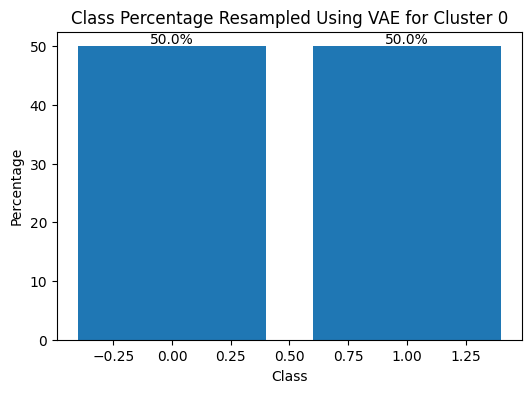

Processing Cluster 1


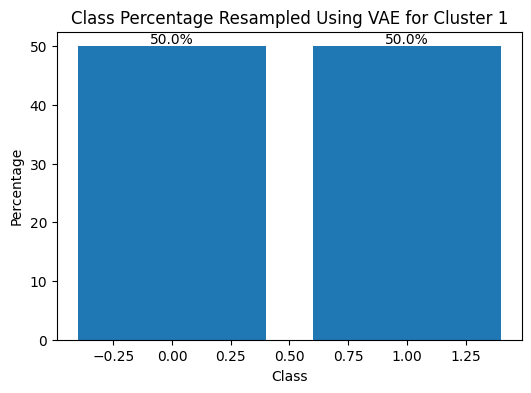

Processing Cluster 2


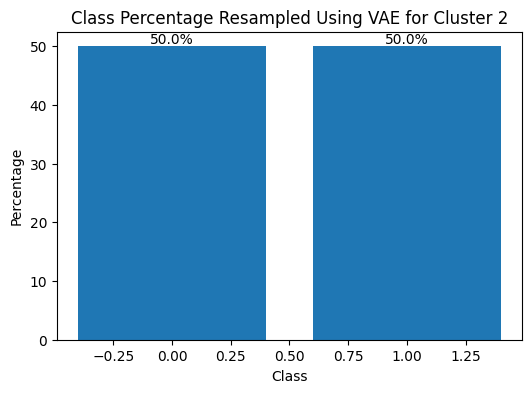

Processing Cluster 3


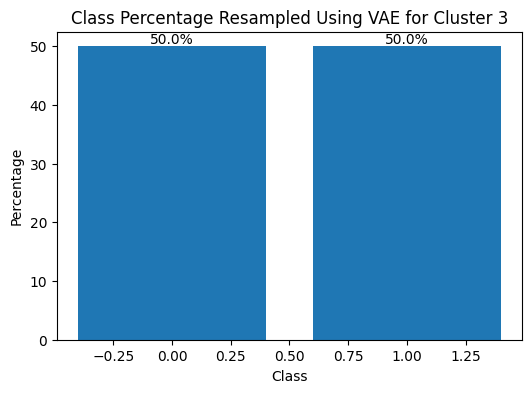

Processing Cluster 4


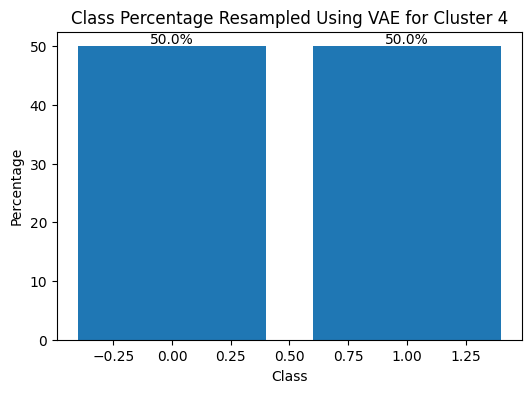

Processing Cluster 5


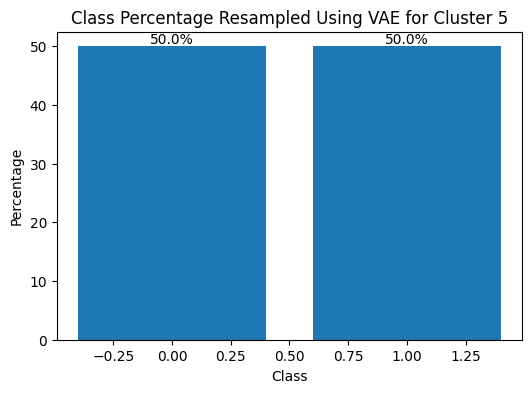

Processing Cluster 6


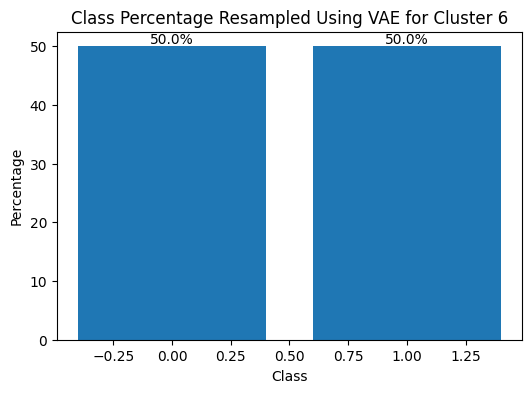

Processing Cluster 7


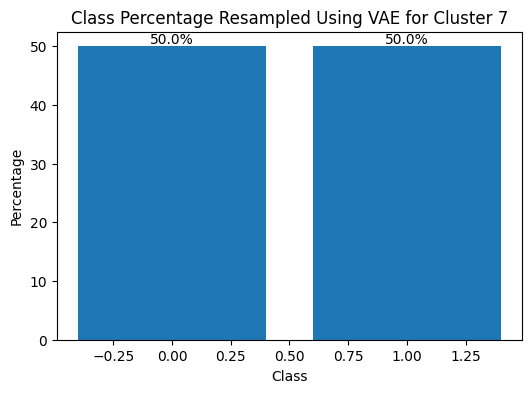

Processing Cluster 8


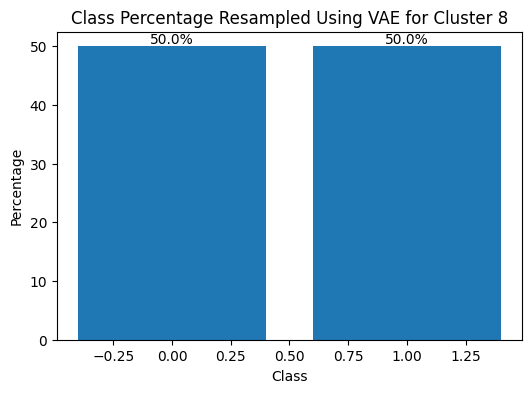

Label distribution after applying VAE across all clusters: 
0    479425
1    479425
Name: count, dtype: int64


In [72]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
import matplotlib.pyplot as plt

# Initialize lists to store combined data
X_combined_vae_list = []
y_combined_vae_list = []

# Function to define the VAE
class VAE(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim):
        super(VAE, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, latent_dim * 2)  # mean and log-variance
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, input_dim)
        )

    def encode(self, x):
        h = self.encoder(x)
        mu, log_var = h.chunk(2, dim=-1)
        return mu, log_var

    def reparameterize(self, mu, log_var):
        std = torch.exp(0.5 * log_var)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        return self.decoder(z)

    def forward(self, x):
        mu, log_var = self.encode(x)
        z = self.reparameterize(mu, log_var)
        return self.decode(z), mu, log_var

# Loss function
def loss_function(recon_x, x, mu, log_var):
    BCE = nn.functional.mse_loss(recon_x, x, reduction='sum')
    KLD = -0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())
    return BCE + KLD

# Function to train VAE and generate synthetic samples based on minority class
def train_vae_generate_synthetic(X_cluster, y_cluster, minority_class, latent_dim=20, hidden_dim=64, epochs=100, lr=1e-3):
    n_minority_class = np.sum(y_cluster == minority_class)
    n_majority_class = np.sum(y_cluster != minority_class)
    n_synthetic_samples = n_majority_class - n_minority_class

    # Separate minority class data
    minority_class_data = X_cluster[y_cluster == minority_class].to_numpy()

    input_dim = minority_class_data.shape[1]
    vae = VAE(input_dim, hidden_dim, latent_dim)
    optimizer = optim.Adam(vae.parameters(), lr=lr)

    # Convert minority class data to tensor
    minority_class_tensor = torch.FloatTensor(minority_class_data)
    dataset = TensorDataset(minority_class_tensor)
    dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

    # Training loop
    for epoch in range(epochs):
        for batch in dataloader:
            x, = batch
            optimizer.zero_grad()
            recon_x, mu, log_var = vae(x)
            loss = loss_function(recon_x, x, mu, log_var)
            loss.backward()
            optimizer.step()

    # Generate synthetic samples
    vae.eval()
    with torch.no_grad():
        z = torch.randn(n_synthetic_samples, latent_dim)
        synthetic_samples = vae.decode(z).numpy()

    # Combine original data with synthetic samples
    X_resampled = np.vstack((X_cluster, synthetic_samples))
    y_resampled = np.hstack((y_cluster, np.full(n_synthetic_samples, minority_class)))

    return X_resampled, y_resampled

# Loop over each cluster
for i in range(9):
    print(f"Processing Cluster {i}")
    
    # Select the current cluster data
    X_cluster = X_clusters[f'X_cluster_{i}']
    y_cluster = y_clusters[f'y_cluster_{i}']
    
    # Determine the minority class (0 or 1)
    if np.sum(y_cluster == 1) < np.sum(y_cluster == 0):
        minority_class = 1
    else:
        minority_class = 0

    # Train the VAE and generate synthetic samples based on the minority class
    X_resampled, y_resampled = train_vae_generate_synthetic(X_cluster, y_cluster, minority_class)

    # Convert y to pandas Series to use value_counts
    y_resampled_series = pd.Series(y_resampled)

    # Calculate class percentage for each cluster
    class_percentage = (y_resampled_series.value_counts(normalize=True) * 100).round(0)

    # Plot the bar graph for the current cluster
    plt.figure(figsize=(6, 4))
    plt.bar(class_percentage.index, class_percentage.values)
    plt.xlabel('Class')
    plt.ylabel('Percentage')
    plt.title(f'Class Percentage Resampled Using VAE for Cluster {i}')
    for j, v in enumerate(class_percentage):
        plt.text(j, v, f'{v}%', ha='center', va='bottom')
    plt.show()

    # Append to the list of combined data
    X_combined_vae_list.append(X_resampled)
    y_combined_vae_list.append(y_resampled)

# Combine data across all clusters
X_combined_vae = np.vstack(X_combined_vae_list)
y_combined_vae = np.hstack(y_combined_vae_list)

# Convert y_combined_vae to pandas Series for further analysis
y_combined_vae_series = pd.Series(y_combined_vae)

# Output the distribution of labels after applying VAE
value_counts = y_combined_vae_series.value_counts()
print(f"Label distribution after applying VAE across all clusters: \n{value_counts}")


# <span style="color: green; font-size: 30px; font-weight: bold;">building the model</span>

without Up sampling

              precision    recall  f1-score   support

           0       0.77      0.90      0.83     39063
           1       0.83      0.65      0.73     29401

    accuracy                           0.79     68464
   macro avg       0.80      0.77      0.78     68464
weighted avg       0.80      0.79      0.79     68464

              precision    recall  f1-score   support

           0       0.77      0.90      0.83     39290
           1       0.82      0.65      0.73     29174

    accuracy                           0.79     68464
   macro avg       0.80      0.77      0.78     68464
weighted avg       0.80      0.79      0.79     68464

              precision    recall  f1-score   support

           0       0.77      0.89      0.83     38990
           1       0.82      0.66      0.73     29474

    accuracy                           0.79     68464
   macro avg       0.80      0.77      0.78     68464
weighted avg       0.80      0.79      0.79     68464

              preci

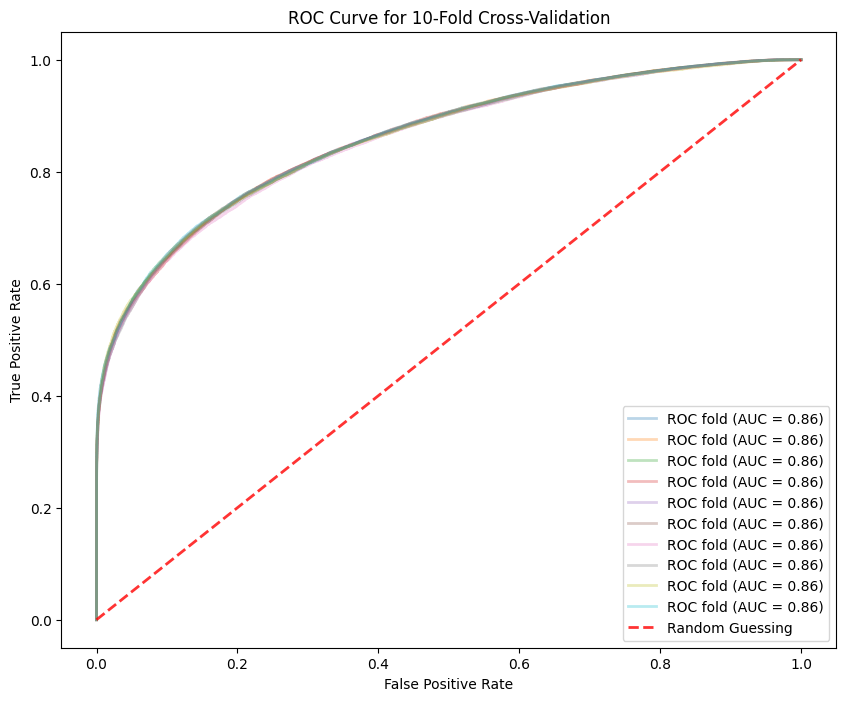

Average AUC from 10-fold cross-validation: 0.8589


In [60]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc

# Initialize the XGBoost Classifier
xgb_clf = xgb.XGBClassifier(
    objective='binary:logistic',
    n_estimators=250,
    learning_rate=0.3,
    max_depth=5,
    seed=42,
    min_child_weight=50,
    max_delta_step=5,
    max_leaves=100,
)

# Initialize KFold with 10 splits
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store metrics for each fold
accuracies = []
tprs = []
fprs = []
aucs = []

# Plotting setup
plt.figure(figsize=(10, 8))

# Perform 10-fold cross-validation manually
for train_index, test_index in kf.split(X_scaled):
    # Split data into train and test sets
    X_train, X_test = X_scaled.iloc[train_index], X_scaled.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Train the model
    xgb_clf.fit(X_train, y_train)
    
    # Predict and evaluate
    y_pred = xgb_clf.predict(X_test)
    y_pred_prob = xgb_clf.predict_proba(X_test)[:, 1]  # Get the probabilities for the positive class
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(classification_report(y_test, y_pred))
    
    # Calculate ROC and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    
    # Store the FPR and TPR for each fold for later plotting
    tprs.append(tpr)
    fprs.append(fpr)
    
    # Plot the ROC curve for each fold
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label=f'ROC fold (AUC = {roc_auc:.2f})')
    

# Calculate the average accuracy across the 10 folds
average_accuracy = sum(accuracies) / len(accuracies)
print(f'Average accuracy from 10-fold cross-validation: {average_accuracy:.4f}')

# Plot the diagonal line representing random guessing
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random Guessing', alpha=.8)

# Finalize the ROC plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for 10-Fold Cross-Validation')
plt.legend(loc='lower right')
plt.show()

# Print the average AUC
average_auc = sum(aucs) / len(aucs)
print(f'Average AUC from 10-fold cross-validation: {average_auc:.4f}')

with GAN

In [61]:
# import xgboost as xgb
# from sklearn.metrics import accuracy_score, classification_report
# from sklearn.model_selection import KFold, cross_val_score
# from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc

# # Initialize the XGBoost Classifier
# xgb_clf = xgb.XGBClassifier(
#     objective='binary:logistic',
#     n_estimators=250,
#     learning_rate=0.3,
#     max_depth=5,
#     seed=42,
#     min_child_weight=50,
#     max_delta_step=5,
#     max_leaves=100,
# )

# # Initialize KFold with 10 splits
# kf = KFold(n_splits=10, shuffle=True, random_state=42)

# # Lists to store metrics for each fold
# accuracies = []
# tprs = []
# fprs = []
# aucs = []

# # Plotting setup
# plt.figure(figsize=(10, 8))

# # Perform 10-fold cross-validation manually
# for train_index, test_index in kf.split(X_scaled):
#     # Split data into train and test sets
#     X_train, X_test = X_combined_gan[train_index], X_combined_gan[test_index]
#     y_train, y_test = y_combined_gan[train_index], y_combined_gan[test_index]
    
#     # Train the model
#     xgb_clf.fit(X_train, y_train)
    
#     # Predict and evaluate
#     y_pred = xgb_clf.predict(X_test)
#     y_pred_prob = xgb_clf.predict_proba(X_test)[:, 1]  # Get the probabilities for the positive class
    
#     accuracy = accuracy_score(y_test, y_pred)
#     accuracies.append(accuracy)
#     print(classification_report(y_test, y_pred))
    
#     # Calculate ROC and AUC
#     fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
#     roc_auc = auc(fpr, tpr)
#     aucs.append(roc_auc)
    
#     # Store the FPR and TPR for each fold for later plotting
#     tprs.append(tpr)
#     fprs.append(fpr)
    
#     # Plot the ROC curve for each fold
#     plt.plot(fpr, tpr, lw=2, alpha=0.3, label=f'ROC fold (AUC = {roc_auc:.2f})')
    

# # Calculate the average accuracy across the 10 folds
# average_accuracy = sum(accuracies) / len(accuracies)
# print(f'Average accuracy from 10-fold cross-validation: {average_accuracy:.4f}')

# # Plot the diagonal line representing random guessing
# plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random Guessing', alpha=.8)

# # Finalize the ROC plot
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve for 10-Fold Cross-Validation')
# plt.legend(loc='lower right')
# plt.show()

# # Print the average AUC
# average_auc = sum(aucs) / len(aucs)
# print(f'Average AUC from 10-fold cross-validation: {average_auc:.4f}')

NameError: name 'X_combined_gan' is not defined

<Figure size 1000x800 with 0 Axes>

with VAE

              precision    recall  f1-score   support

           0       0.86      0.97      0.91     34303
           1       0.96      0.84      0.89     33777

    accuracy                           0.90     68080
   macro avg       0.91      0.90      0.90     68080
weighted avg       0.91      0.90      0.90     68080

              precision    recall  f1-score   support

           0       0.86      0.96      0.91     34481
           1       0.96      0.84      0.89     33599

    accuracy                           0.90     68080
   macro avg       0.91      0.90      0.90     68080
weighted avg       0.91      0.90      0.90     68080

              precision    recall  f1-score   support

           0       0.86      0.96      0.91     34464
           1       0.96      0.84      0.89     33616

    accuracy                           0.90     68080
   macro avg       0.91      0.90      0.90     68080
weighted avg       0.91      0.90      0.90     68080

              preci

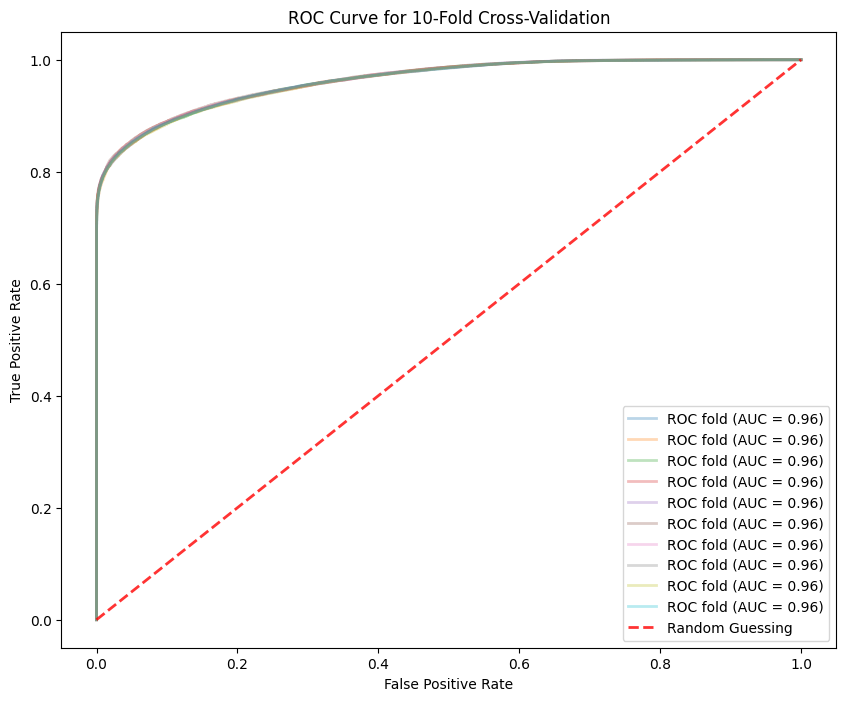

Average AUC from 10-fold cross-validation: 0.9628


In [ ]:
# import xgboost as xgb
# from sklearn.metrics import accuracy_score, classification_report
# from sklearn.model_selection import KFold, cross_val_score
# from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc

# # Initialize the XGBoost Classifier
# xgb_clf = xgb.XGBClassifier(
#     objective='binary:logistic',
#     n_estimators=250,
#     learning_rate=0.3,
#     max_depth=5,
#     seed=42,
#     min_child_weight=50,
#     max_delta_step=5,
#     max_leaves=100,
# )

# # Initialize KFold with 10 splits
# kf = KFold(n_splits=10, shuffle=True, random_state=42)

# # Lists to store metrics for each fold
# accuracies = []
# tprs = []
# fprs = []
# aucs = []

# # Plotting setup
# plt.figure(figsize=(10, 8))

# # Perform 10-fold cross-validation manually
# for train_index, test_index in kf.split(X_scaled):
#     # Split data into train and test sets
#     X_train, X_test = X_combined_vae[train_index], X_combined_vae[test_index]
#     y_train, y_test = y_combined_vae[train_index], y_combined_vae[test_index]
    
#     # Train the model
#     xgb_clf.fit(X_train, y_train)
    
#     # Predict and evaluate
#     y_pred = xgb_clf.predict(X_test)
#     y_pred_prob = xgb_clf.predict_proba(X_test)[:, 1]  # Get the probabilities for the positive class
    
#     accuracy = accuracy_score(y_test, y_pred)
#     accuracies.append(accuracy)
#     print(classification_report(y_test, y_pred))
    
#     # Calculate ROC and AUC
#     fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
#     roc_auc = auc(fpr, tpr)
#     aucs.append(roc_auc)
    
#     # Store the FPR and TPR for each fold for later plotting
#     tprs.append(tpr)
#     fprs.append(fpr)
    
#     # Plot the ROC curve for each fold
#     plt.plot(fpr, tpr, lw=2, alpha=0.3, label=f'ROC fold (AUC = {roc_auc:.2f})')
    

# # Calculate the average accuracy across the 10 folds
# average_accuracy = sum(accuracies) / len(accuracies)
# print(f'Average accuracy from 10-fold cross-validation: {average_accuracy:.4f}')

# # Plot the diagonal line representing random guessing
# plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random Guessing', alpha=.8)

# # Finalize the ROC plot
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve for 10-Fold Cross-Validation')
# plt.legend(loc='lower right')
# plt.show()

# # Print the average AUC
# average_auc = sum(aucs) / len(aucs)
# print(f'Average AUC from 10-fold cross-validation: {average_auc:.4f}')

# <span style="color: green; font-size: 30px; font-weight: bold;">feature importance</span>

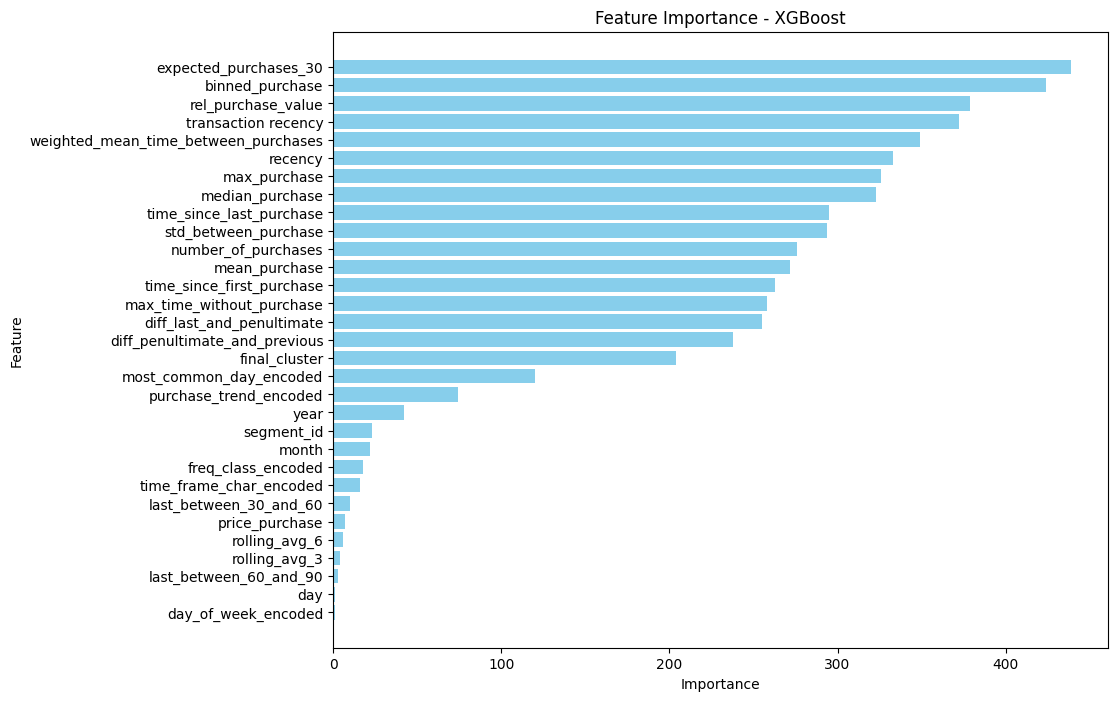

In [65]:
# After cross-validation, fit the model on the entire dataset
# Initialize the XGBoost Classifier
xgb_clf = xgb.XGBClassifier(
    objective='binary:logistic',
    n_estimators=250,
    learning_rate=0.3,
    max_depth=5,
    seed=42,
    min_child_weight=50,
    max_delta_step=5,
    max_leaves=100,
)

xgb_clf.fit(X_scaled, y)

# Extract feature importances
feature_importance = xgb_clf.get_booster().get_score(importance_type='weight')

# Create a DataFrame for easy manipulation
importance_df = pd.DataFrame({'Feature': list(feature_importance.keys()), 
                              'Importance': list(feature_importance.values())})

# Sort and plot the feature importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance - XGBoost')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()


# <span style="color: green; font-size: 30px; font-weight: bold;">grid search</span>

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 250, 500],  # You can add more values for finer tuning
    'learning_rate': [0.01, 0.1, 0.3, 0.5],
    'max_depth': [3, 5, 7],
    'min_child_weight': [30, 50, 70],
    'max_delta_step': [1, 5, 10],
    'max_leaves': [50, 100, 150],
}

# Initialize the XGBoost classifier with fixed parameters
xgb_clf = xgb.XGBClassifier(seed=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb_clf,
                           param_grid=param_grid,
                           scoring='accuracy',  # You can use other metrics like 'roc_auc', 'f1', etc.
                           cv=5,  # 5-fold cross-validation
                           verbose=1,
                           n_jobs=-1)  # Use all available cores

# Fit the grid search to the data
grid_search.fit(X_scaled, y)

# Print the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)


# <span style="color: green; font-size: 30px; font-weight: bold;">custom treshhold</span>

In [ ]:
# probabilities_class_1 = probabilities[:, 1]

# # Default threshold
# threshold = 0.8

# # Generate predictions based on the threshold
# custom_predictions = (probabilities_class_1 >= threshold).astype(int)

# print("Default Model Predictions: (on test data)")
# print(confusion_matrix(y_test, predictions_test))
# print(classification_report(y_test, predictions_test))

# print("Custom Threshold Predictions:")
# print(confusion_matrix(y_test, custom_predictions))
# print(classification_report(y_test, custom_predictions))


In [ ]:
# len(probabilities_class_1)

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.metrics import confusion_matrix

# # Assuming y_test, predictions_test, and custom_predictions are already defined
# cm_default = confusion_matrix(y_test, predictions_test)
# cm_custom = confusion_matrix(y_test, custom_predictions)

# fig, ax = plt.subplots(1, 2, figsize=(12, 6))  # Create a figure with two subplots (side by side)

# # Confusion Matrix for Default Model Predictions
# sns.heatmap(cm_default, annot=True, fmt="d", cmap='Blues', ax=ax[0], cbar=False)
# ax[0].set_title('Default Model Predictions')
# ax[0].set_xlabel('Predicted Label')
# ax[0].set_ylabel('True Label')
# ax[0].set_xticklabels(['0', '1'])
# ax[0].set_yticklabels(['0', '1'])

# # Confusion Matrix for Custom Threshold Predictions
# sns.heatmap(cm_custom, annot=True, fmt="d", cmap='Blues', ax=ax[1], cbar=False)
# ax[1].set_title('Custom Threshold Predictions')
# ax[1].set_xlabel('Predicted Label')
# ax[1].set_ylabel('True Label')
# ax[1].set_xticklabels(['0', '1'])
# ax[1].set_yticklabels(['0', '1'])

# plt.tight_layout()  # Adjust the layout to make room for everything
# plt.show()  # Display the plots


In [ ]:
# importances = xgb_clf.feature_importances_
# feature_names = X_train.columns  # If X_train was a DataFrame before scaling

# # Now print feature importances
# for i, v in enumerate(importances):
#     print(f'Feature: {feature_names[i]}, Score: {v:.5f}')

In [ ]:
# correlation_matrix = X_train.corr()

# plt.figure(figsize=(15, 15))
# sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
# plt.show()

In [ ]:
# from sklearn.metrics import roc_curve, auc
# import matplotlib.pyplot as plt

# # Assuming you have an XGBoost classifier named xgb_clf and your test set X_test
# probabilities_test = xgb_clf.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# fpr, tpr, thresholds = roc_curve(y_test, probabilities_test)
# roc_auc = auc(fpr, tpr)

# plt.figure()
# plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic')
# plt.legend(loc="lower right")
# plt.show()


# <span style="color: green; font-size: 30px; font-weight: bold;"> model Peakle</span>

In [67]:
import pickle


# Initialize the XGBoost Classifier
xgb_clf = xgb.XGBClassifier(
    objective='binary:logistic',
    n_estimators=250,
    learning_rate=0.3,
    max_depth=5,
    seed=42,
    min_child_weight=50,
    max_delta_step=5,
    max_leaves=100,
)

xgb_clf.fit(X_scaled, y)

# Save the model to a file using pickle
with open("XGBoostmodel.pkl", "wb") as file:
    pickle.dump(xgb_clf, file)

print("Model saved to XGBoostmodel.pkl")


Model saved to XGBoostmodel.pkl
